# 02 - Neural Network for classification problem Exercices 

1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

<center><img src="../images/02-tensorflow-playground-replication-exercise.png" width=650px></center>

3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [125]:
# import librairies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

<center><img src="../images/02-tensorflow-playground-replication-exercise.png" width=650px></center>

In [126]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_playground = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu",input_shape=(2,)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_playground.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

In [127]:
# Check the summary
model_playground.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 6)                 18        
                                                                 
 dense_56 (Dense)            (None, 6)                 42        
                                                                 
 dense_57 (Dense)            (None, 6)                 42        
                                                                 
 dense_58 (Dense)            (None, 6)                 42        
                                                                 
 dense_59 (Dense)            (None, 6)                 42        
                                                                 
 dense_60 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable

### 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [128]:
# Import dataset 
from sklearn.datasets import make_moons

In [129]:
# Create the dataset
X, y = make_moons(n_samples=1000,noise=0.05, random_state=42)

In [130]:
# Check the Shape of the dataset
print(f"Features Shape : {X.shape}")
print(f"Labels Shape : {y.shape}")

Features Shape : (1000, 2)
Labels Shape : (1000,)


In [131]:
# Visualize the Data
print("Features :",X[:10],sep="\n",end="\n")
print("Labels :",y[:10],sep="\n")

Features :
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 [ 0.37736316 -0.39703717]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]
 [ 1.6201408  -0.28758856]
 [ 0.68246733  0.80712069]]
Labels :
[1 1 1 1 0 1 1 1 1 0]


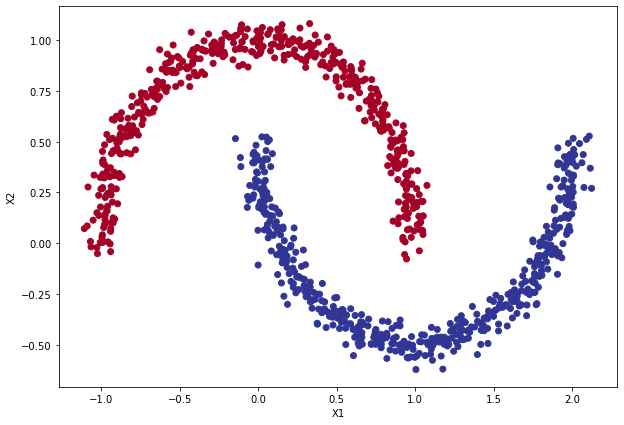

In [132]:
# Let's plot a figure of our data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Now that we're familiar with the dataset. We can try to build a first model to classify the data. 

Before creating our model we need to split the data into a Train and test set.

In [133]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
# Shapes
print(f"Features Shape of the training set: {X_train.shape}")
print(f"Labels Shape of the training set: {y_train.shape}")
print(f"Features Shape of the test set: {X_test.shape}")
print(f"Labels Shape of the test set: {y_test.shape}")

Features Shape of the training set: (800, 2)
Labels Shape of the training set: (800,)
Features Shape of the test set: (200, 2)
Labels Shape of the test set: (200,)


First let's try a small model with 1 or 2 layers using:
- **Activation** : "relu"
- **Number of units** : 4
- **Optimizer** : Adam

In [135]:
# set random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit
history_1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 860us/step - loss: 0.6504 - accuracy: 0.6463
Epoch 2/100
25/25 [==============================] - 0s 873us/step - loss: 0.6244 - accuracy: 0.7500
Epoch 3/100
25/25 [==============================] - 0s 984us/step - loss: 0.5990 - accuracy: 0.8650
Epoch 4/100
25/25 [==============================] - 0s 865us/step - loss: 0.5747 - accuracy: 0.8763
Epoch 5/100
25/25 [==============================] - 0s 927us/step - loss: 0.5515 - accuracy: 0.8737
Epoch 6/100
25/25 [==============================] - 0s 887us/step - loss: 0.5288 - accuracy: 0.8725
Epoch 7/100
25/25 [==============================] - 0s 943us/step - loss: 0.5071 - accuracy: 0.8725
Epoch 8/100
25/25 [==============================] - 0s 861us/step - loss: 0.4863 - accuracy: 0.8725
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.8700
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 

In [136]:
# Evaluate our model
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8950


[0.24120382964611053, 0.8949999809265137]

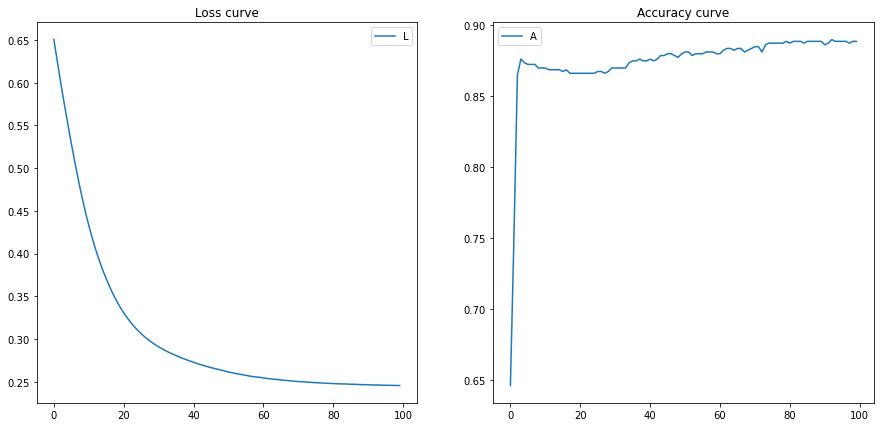

In [137]:
# See the learning curves
fig,axs = plt.subplots(1,2,figsize=(15,7))
pd.DataFrame(history_1.history["loss"]).plot(ax=axs[0],title="Loss curve")
axs[0].legend("Loss")
pd.DataFrame(history_1.history["accuracy"]).plot(ax=axs[1],title="Accuracy curve")
axs[1].legend("Accuracy")
plt.show()

We got a loss of 0.24 and an accuracy of 89%. Not bad! Let's try to improve our result by adding more hidden layers and neurons.

In [138]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_2 = model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 935us/step - loss: 0.6639 - accuracy: 0.5312
Epoch 2/100
25/25 [==============================] - 0s 932us/step - loss: 0.6438 - accuracy: 0.7337
Epoch 3/100
25/25 [==============================] - 0s 947us/step - loss: 0.6170 - accuracy: 0.8450
Epoch 4/100
25/25 [==============================] - 0s 974us/step - loss: 0.5837 - accuracy: 0.8587
Epoch 5/100
25/25 [==============================] - 0s 948us/step - loss: 0.5442 - accuracy: 0.8625
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.8550
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8637
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8700
Epoch 9/100
 1/25 [>.............................] - ETA: 0s - loss: 0.3081 - accuracy: 0.9375

KeyboardInterrupt: 

In [ ]:
# Evaluate our model
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.8850


[0.21226367354393005, 0.8849999904632568]

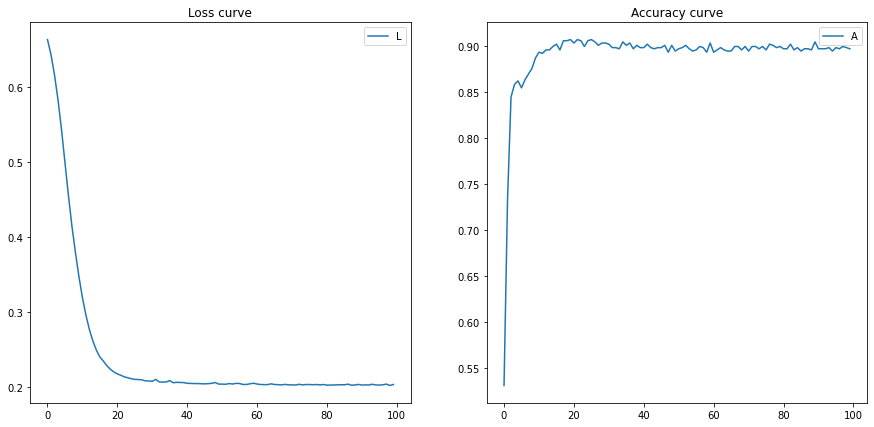

In [ ]:
# See the learning curves
fig,axs = plt.subplots(1,2,figsize=(15,7))
pd.DataFrame(history_2.history["loss"]).plot(ax=axs[0],title="Loss curve")
axs[0].legend("Loss")
pd.DataFrame(history_2.history["accuracy"]).plot(ax=axs[1],title="Accuracy curve")
axs[1].legend("Accuracy")
plt.show()

According to the learning curves, it seems our model_2 performs a little better than the model_1. Let's plot some predictions to compare the two models

In [ ]:
from numpy import meshgrid
from numpy import hstack

# plot predictions
def plot_predictions_map(X,y, model):

    # Min & max
    min1, max1 = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    min2, max2 = X[:,1].min() - 0.1 , X[:,1].max() + 0.1

    # define the x and y scale
    x1grid = np.linspace(min1,max1,100)
    x2grid = np.linspace(min2,max2,100)

    # Create all the lines and row of the grid
    xx, yy = meshgrid(x1grid, x2grid)

    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((r1.shape[0],1)),r2.reshape((r2.shape[0],1))

    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))

    # make predictions
    y_pred = model.predict(grid)

    # add classes to predictions
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0

    # reshape
    y_pred = y_pred.reshape(xx.shape)

    # plot
    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    

Text(0.5, 1.0, 'Test model_2')

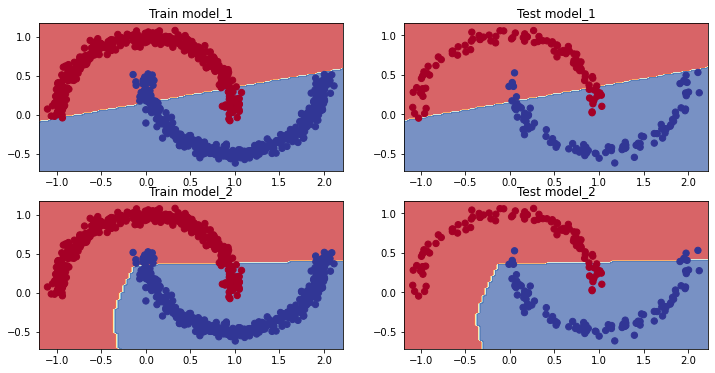

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plot_predictions_map(X_train ,y_train,model_1)
plt.title("Train model_1")
plt.subplot(2,2,2)
plot_predictions_map(X_test ,y_test,model_1)
plt.title("Test model_1")
plt.subplot(2,2,3)
plot_predictions_map(X_train ,y_train,model_2)
plt.title("Train model_2")
plt.subplot(2,2,4)
plot_predictions_map(X_test ,y_test,model_2)
plt.title("Test model_2")

As we can see the model_2 has better results thant the first model  when we visualize the boundary decision made by our models.

Let's try to find the best learning rate in order to improve our model if possible. In order to find the best learning rate we will use a callback function

In [ ]:
# model 3
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Callback learning rate
callback_lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 **(epoch/20))

# fit the model
history_3 = model_3.fit(X_train,y_train, epochs = 100, callbacks=[callback_lr])

Epoch 1/100
25/25 [==============================] - 0s 921us/step - loss: 0.6724 - accuracy: 0.5000 - lr: 1.0000e-05
Epoch 2/100
25/25 [==============================] - 0s 892us/step - loss: 0.6722 - accuracy: 0.5000 - lr: 1.1220e-05
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.5000 - lr: 1.2589e-05
Epoch 4/100
25/25 [==============================] - 0s 871us/step - loss: 0.6718 - accuracy: 0.5000 - lr: 1.4125e-05
Epoch 5/100
25/25 [==============================] - 0s 916us/step - loss: 0.6715 - accuracy: 0.5000 - lr: 1.5849e-05
Epoch 6/100
25/25 [==============================] - 0s 873us/step - loss: 0.6713 - accuracy: 0.5000 - lr: 1.7783e-05
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.5000 - lr: 1.9953e-05
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.5000 - lr: 2.2387e-05
Epoch 9/100
25/25 [==============================] - 0s 1ms/st

Text(0.5, 1.0, 'Learning rate vs Loss')

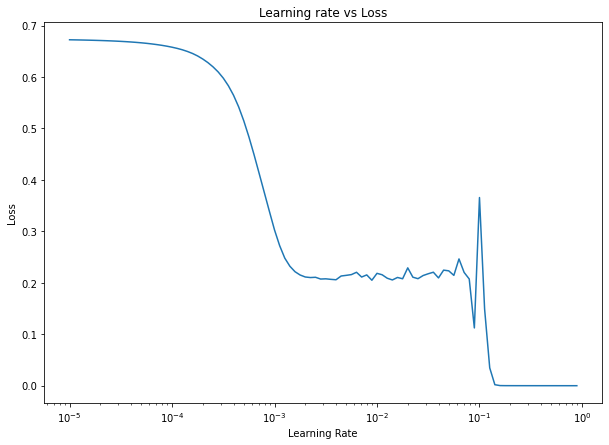

In [ ]:
# Plot the learning rate
x = 1e-5 * 10 ** (np.arange(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(x,history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

It seems the optimal learning rate is between 0.0005 and 0.001. In tensorflow the default learning rate of the Adam optimizer is 0.001, it explains why our model has good result with the default learning rate.

So Let's build a last model with a learning rate of 0.0005. We will train our model model on 150 epochs to see if the results can be improved.

In [ ]:
tf.random.set_seed(42)

# create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0006),
                metrics = ["accuracy"])

history_4 = model_4.fit(X_train,y_train,epochs = 150)

Epoch 1/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5150
Epoch 2/150
25/25 [==============================] - 0s 997us/step - loss: 0.6563 - accuracy: 0.6062
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.7575
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.8225
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.8500
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.8587
Epoch 7/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.8587
Epoch 8/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.8575
Epoch 9/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.8587
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.8600
Epoch 1

In [ ]:
# Evaluate
print("Model 1:",model_1.evaluate(X_test,y_test))
print("Model 2:",model_2.evaluate(X_test,y_test))
print("Model 4:",model_4.evaluate(X_test,y_test))

7/7 [==============================] - 0s 997us/step - loss: 0.2412 - accuracy: 0.8950
Model 1: [0.24120382964611053, 0.8949999809265137]
7/7 [==============================] - 0s 998us/step - loss: 0.2123 - accuracy: 0.8850
Model 2: [0.21226367354393005, 0.8849999904632568]
7/7 [==============================] - 0s 998us/step - loss: 0.2114 - accuracy: 0.8750
Model 4: [0.21143847703933716, 0.875]


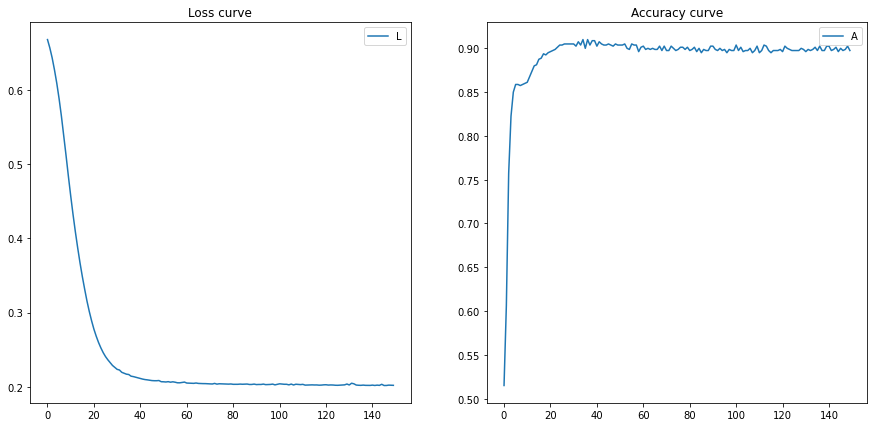

In [ ]:
# See the learning curves
fig,axs = plt.subplots(1,2,figsize=(15,7))
pd.DataFrame(history_4.history["loss"]).plot(ax=axs[0],title="Loss curve")
axs[0].legend("Loss")
pd.DataFrame(history_4.history["accuracy"]).plot(ax=axs[1],title="Accuracy curve")
axs[1].legend("Accuracy")
plt.show()

Text(0.5, 1.0, 'Test model_4')

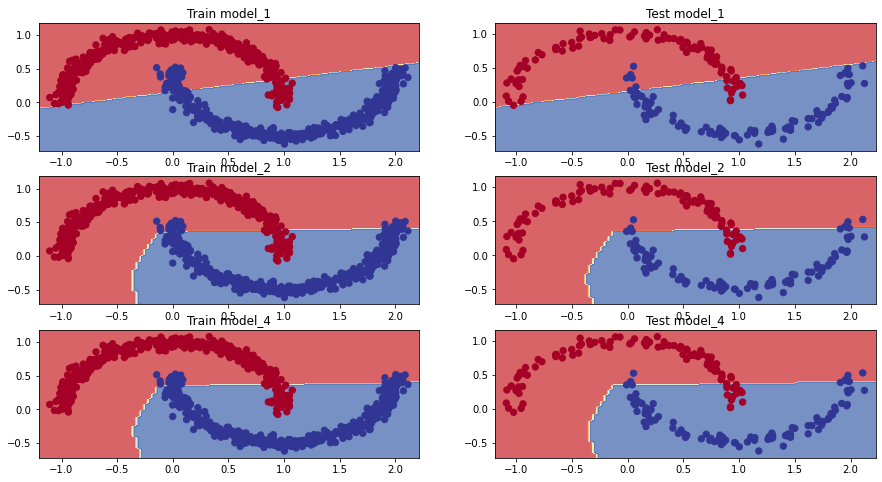

In [ ]:
# Compare the models
plt.figure(figsize = (15,8))
plt.subplot(3,2,1)
plot_predictions_map(X_train ,y_train,model_1)
plt.title("Train model_1")
plt.subplot(3,2,2)
plot_predictions_map(X_test ,y_test,model_1)
plt.title("Test model_1")
plt.subplot(3,2,3)
plot_predictions_map(X_train ,y_train,model_2)
plt.title("Train model_2")
plt.subplot(3,2,4)
plot_predictions_map(X_test ,y_test,model_2)
plt.title("Test model_2")
plt.subplot(3,2,5)
plot_predictions_map(X_train ,y_train,model_4)
plt.title("Train model_4")
plt.subplot(3,2,6)
plot_predictions_map(X_test ,y_test,model_4)
plt.title("Test model_4")

As we can see the model_2 and the model_4 have both good results. The accuracy is better on the model_2 (0.8850) which use the default learning rate of the Adam optimizer 0.001.

In [ ]:
# make predictions
y_preds_2 = model_2.predict(X_test)
y_preds_4 = model_4.predict(X_test)

# change the percentage into labels
y_preds_2[y_preds_2 >= 0.5] = 1
y_preds_2[y_preds_2 < 0.5] = 0

y_preds_4[y_preds_4 >= 0.5] = 1
y_preds_4[y_preds_4 < 0.5] = 0

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix_model2 = confusion_matrix(y_test,y_preds_2)
confusion_matrix_model4 = confusion_matrix(y_test,y_preds_4)

Text(0.5, 1.0, 'CM model4')

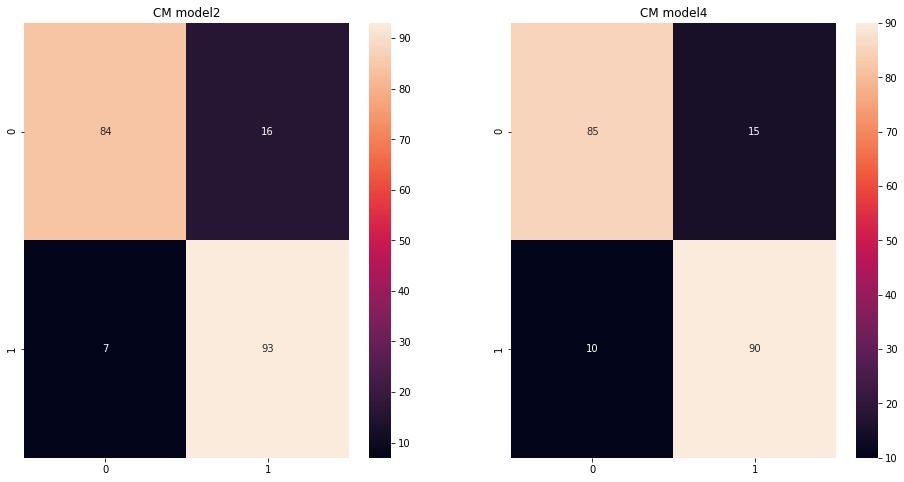

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix_model2,annot=True,fmt="d")
plt.title("CM model2")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix_model4,annot=True)
plt.title("CM model4")

### 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [139]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [140]:
# Import the FASHION MNIST data set
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels) , (test_data,test_labels) = fashion_mnist.load_data()

In [141]:
# Shapes
print(f'Train data shape : {train_data.shape}')
print(f'Train labels shape : {train_labels.shape}')
print(f'Test data shape : {test_data.shape}')
print(f'Test labels shape : {test_labels.shape}')

Train data shape : (60000, 28, 28)
Train labels shape : (60000,)
Test data shape : (10000, 28, 28)
Test labels shape : (10000,)


In [204]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [142]:
# Create the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

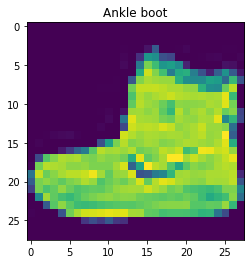

In [143]:
# Plot an image
plt.figure()
plt.imshow(train_data[0])
plt.title(class_names[train_labels[0]])

In [175]:
import random

# Plot function
def plot_pictures(data,labels):

    # create figure
    fig,axes = plt.subplots(nrows = 1, ncols = 10, figsize = (16,8))
    
    for i in range(10):

        # Select random pictures
        random_index = random.choice(np.arange(data.shape[0]))
        random_picture = data[random_index]
        picture_label = labels[random_index]
        picture_classname = class_names[picture_label]

        axes[i].imshow(random_picture)
        axes[i].set_title(picture_classname)
    
    fig.tight_layout()
    

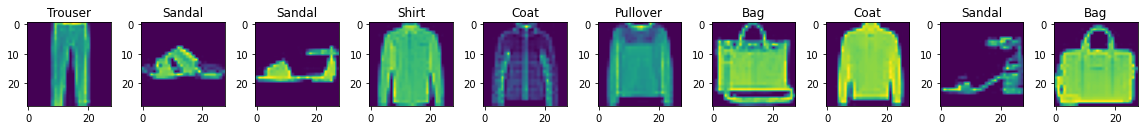

In [176]:
plot_pictures(train_data,train_labels)

### 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [203]:
def softmax(y_pred):

    """
    input
    - y_pred : array of predictions

    return:
    - softmax value of the predictions
    """

    # change type of y_pred
    y_pred = y_pred.astype(float)

    return np.exp(y_pred) / np.sum(np.exp(y_pred))

### 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

We are working on a classification problem, more specifically about a multiclass classification problem. Indeed the dataset labels contains 10 different classes. So we need to build a model for a multiclass classification problem :
- **output layer activation :** Softmax
- **input layer**: need to flatten the images
- **Loss :** Change BinaryCrossEntropy with CategoricalCrossentropy

In [206]:
# model_mnist_1
tf.random.set_seed(42)

# create a model
model_mnist_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile
model_mnist_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])

# Fit
history_mnist_1 = model_mnist_1.fit(train_data,train_labels,epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.5972 - accuracy: 0.1266
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9133 - accuracy: 0.2205
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6391 - accuracy: 0.3263
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5287 - accuracy: 0.3688
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3598 - accuracy: 0.4395
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2851 - accuracy: 0.4531
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1726 - accuracy: 0.5206
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0922 - accuracy: 0.5432
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0587 - accuracy: 0.5540
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

In [208]:
# Evaluate the model 1
model_mnist_1.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.7620 - accuracy: 0.7339


[0.7620295882225037, 0.7339000105857849]

Text(0.5, 1.0, 'Accuracy')

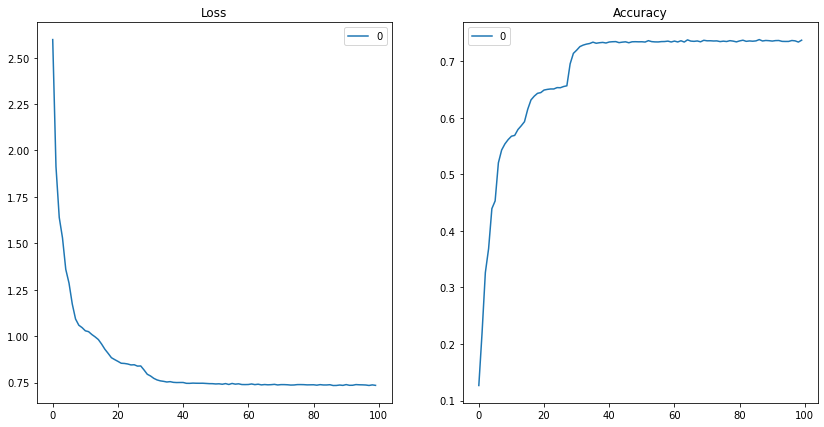

In [212]:
# plot loss curves
fig, axes = plt.subplots(1,2,figsize =(14,7))
pd.DataFrame(history_mnist_1.history["loss"]).plot(ax = axes[0])
axes[0].set_title("Loss")
pd.DataFrame(history_mnist_1.history["accuracy"]).plot(ax = axes[1])
axes[1].set_title("Accuracy")

With our first model we have obtain an accuracy of 73%. We'll try to improve it by adding more hidden layers to our model and try to find the optimal learning rate. We'll use a callback learning rate to find the best learning rate for our Adam optimizer. But before changing our model we will normalize our data to see if it's improve the result of our first model 

In [234]:
# Max of the training data

max_data = train_data.max()

print("Max of the training data:",max_data)

Max of the training data: 255


In [235]:
# Normalize

train_data_normalized = train_data / train_data.max()
test_data_normalized = test_data / train_data.max()

train_data_normalized.max(), test_data_normalized.max()

(1.0, 1.0)

In [236]:
# model_mnist_2
tf.random.set_seed(42)

# create a model
model_mnist_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile
model_mnist_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])

# Fit
history_mnist_2 = model_mnist_2.fit(train_data_normalized,train_labels,epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8950 - accuracy: 0.6770
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5649 - accuracy: 0.8058
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5290 - accuracy: 0.8185
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5067 - accuracy: 0.8249
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4941 - accuracy: 0.8276
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4836 - accuracy: 0.8301
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4769 - accuracy: 0.8311
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4707 - accuracy: 0.8342
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4642 - accuracy: 0.8371
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

In [237]:
# evaluate the model
model_mnist_2.evaluate(test_data_normalized,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.8335


[0.48681172728538513, 0.8335000276565552]

We obtain an accuracy of 83%, so with the normalized data we improved the accuracy of 10 %

Text(0.5, 1.0, 'Accuracy')

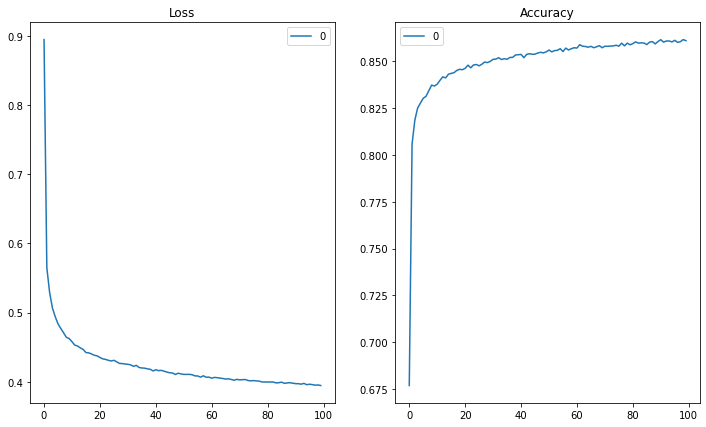

In [246]:
fig, axes = plt.subplots(1,2,figsize =(12,7))
pd.DataFrame(history_mnist_2.history["loss"]).plot(ax = axes[0])
axes[0].set_title("Loss")
pd.DataFrame(history_mnist_2.history["accuracy"]).plot(ax = axes[1])
axes[1].set_title("Accuracy")

Now let's build a larger model and try to find the optimal learning rate

In [254]:
# model 3
tf.random.set_seed(42)

# create model
model_mnist_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

# compile
model_mnist_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])

# callback lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10 **(epoch/10))

# fit
history_mnist_3 = model_mnist_3.fit(train_data_normalized,train_labels,epochs = 50, callbacks = [lr_callback])

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3249 - accuracy: 0.1002 - lr: 1.0000e-06
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3102 - accuracy: 0.1001 - lr: 1.2589e-06
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2924 - accuracy: 0.0996 - lr: 1.5849e-06
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2708 - accuracy: 0.0986 - lr: 1.9953e-06
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2516 - accuracy: 0.1072 - lr: 2.5119e-06
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2324 - accuracy: 0.1214 - lr: 3.1623e-06
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2083 - accuracy: 0.1645 - lr: 3.9811e-06
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1747 - accuracy: 0.2049 - lr: 5.0119e-06
Epoch 9/50
1875/1875 [==========================

Text(0, 0.5, 'Loss')

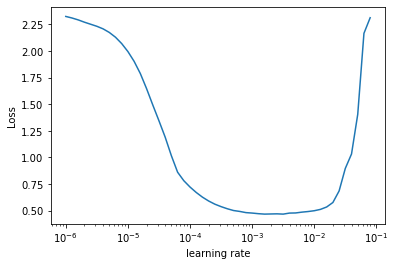

In [255]:
learning_rate = 1e-6 * 10**(np.arange(50)/10)
loss = history_mnist_3.history["loss"]

plt.figure()
plt.semilogx(learning_rate,loss)
plt.xlabel("learning rate")
plt.ylabel("Loss")

According to the previous figure we can try a learning rate of 0.0001 or of 0.00005

In [258]:
# model 3
tf.random.set_seed(42)

# create model
model_mnist_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

# compile
model_mnist_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                      metrics = ["accuracy"])


# fit
history_mnist_4 = model_mnist_4.fit(train_data_normalized,train_labels,epochs = 50, validation_data = (test_data_normalized,test_labels))

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8594 - accuracy: 0.2888 - val_loss: 1.4279 - val_accuracy: 0.4224
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1828 - accuracy: 0.5727 - val_loss: 1.0227 - val_accuracy: 0.6456
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8767 - accuracy: 0.6843 - val_loss: 0.8184 - val_accuracy: 0.7048
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7565 - accuracy: 0.7300 - val_loss: 0.7479 - val_accuracy: 0.7389
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7014 - accuracy: 0.7556 - val_loss: 0.7024 - val_accuracy: 0.7538
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6616 - accuracy: 0.7729 - val_loss: 0.6670 - val_accuracy: 0.7685
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6301 - accuracy: 0.7863 - val_loss: 0.6423 - val_accuracy:

Our model have an accuracy of 83.5% on the test set. We will add more hidden units to our model and the default learning rate. The default learning rate seems to be a good choice according to the previous figure, when we tried to find the optimal lr.

In [260]:
# model 3
tf.random.set_seed(42)

# create model
model_mnist_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

# compile
model_mnist_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])


# fit
history_mnist_5 = model_mnist_5.fit(train_data_normalized,train_labels,epochs = 40, validation_data = (test_data_normalized,test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6530 - accuracy: 0.7656 - val_loss: 0.4937 - val_accuracy: 0.8240
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4378 - accuracy: 0.8435 - val_loss: 0.4720 - val_accuracy: 0.8312
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4039 - accuracy: 0.8551 - val_loss: 0.4643 - val_accuracy: 0.8263
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3823 - accuracy: 0.8627 - val_loss: 0.4495 - val_accuracy: 0.8357
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3663 - accuracy: 0.8676 - val_loss: 0.4276 - val_accuracy: 0.8448
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3532 - accuracy: 0.8719 - val_loss: 0.4467 - val_accuracy: 0.8380
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3461 - accuracy: 0.8735 - val_loss: 0.4041 - val_accuracy:

It seems that adding more hidden units improves the results. Let's try another model with again more hidden units.

In [264]:
# model 3
tf.random.set_seed(42)

# create model
model_mnist_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(60,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

# compile
model_mnist_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])


# fit
history_mnist_6 = model_mnist_6.fit(train_data_normalized,train_labels,epochs = 30, validation_data = (test_data_normalized,test_labels))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5800 - accuracy: 0.7984 - val_loss: 0.4433 - val_accuracy: 0.8434
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3968 - accuracy: 0.8567 - val_loss: 0.4587 - val_accuracy: 0.8374
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3583 - accuracy: 0.8690 - val_loss: 0.3968 - val_accuracy: 0.8559
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8777 - val_loss: 0.3910 - val_accuracy: 0.8588
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8841 - val_loss: 0.3960 - val_accuracy: 0.8590
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3026 - accuracy: 0.8881 - val_loss: 0.3745 - val_accuracy: 0.8644
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8920 - val_loss: 0.3654 - val_accuracy:

We finally obtain a model which has an accuracy closed to 88%.

In [414]:
# predictions
pred_labels = model_mnist_6.predict(test_data_normalized)
pred_labels

array([[2.3010413e-07, 1.2761275e-05, 2.6238762e-08, ..., 5.9569473e-03,
        4.3732481e-07, 9.9397570e-01],
       [3.0568743e-05, 2.6826820e-12, 9.9948043e-01, ..., 1.4242791e-18,
        7.3500228e-13, 2.1045580e-15],
       [1.2320575e-10, 1.0000000e+00, 1.7291404e-19, ..., 1.0205373e-36,
        2.2886386e-15, 8.4148997e-32],
       ...,
       [2.4660889e-05, 2.2102595e-08, 1.0509226e-06, ..., 8.1283409e-14,
        9.9997365e-01, 8.9610497e-10],
       [1.9981744e-06, 9.9999726e-01, 1.5185109e-10, ..., 2.6605828e-19,
        7.0421677e-09, 7.9346215e-17],
       [3.8554191e-09, 4.2198345e-10, 8.5825631e-09, ..., 7.2327319e-05,
        3.1857846e-06, 8.2564311e-09]], dtype=float32)

<AxesSubplot:>

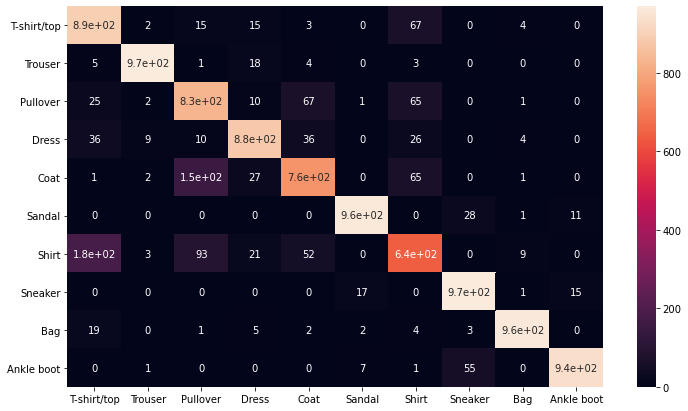

In [420]:
# plot a confusion matrix
y_true = test_labels
y_pred = np.argmax(pred_labels,axis=1)

cm_mnist_6 = confusion_matrix(y_true,y_pred)

plt.figure(figsize = (12,7))
sns.heatmap(cm_mnist_6,annot=True,xticklabels = class_names,yticklabels = class_names)

### 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [398]:
def plot_predictions(data,labels):
    
    # subplots
    fig,axes = plt.subplots(2,4,figsize = (16,8))

    for i in range(4):

        # random choice
        index = random.choice(np.arange(data.shape[0]))
        
        # random picture
        picture = data[index]

        # predictions
        y_pred = model_mnist_6.predict(picture.reshape(1,picture.shape[0],picture.shape[1]))
        y_true = tf.one_hot([labels[index]],depth = 10).numpy()

        # label
        max_percentage = np.max(y_pred)
        label_pred = class_names[np.argmax(y_pred)]
        label_true = class_names[labels[index]]
        
        # plot
        axes[0,i].imshow(picture)
        axes[1,i].scatter(range(10),y_pred.squeeze())
        axes[1,i].scatter(range(10),y_true.squeeze())
        
        # title picture
        if label_pred == label_true:
            axes[0,i].set_title(f'{label_pred} - {max_percentage : .2%}',color="green")
        else:
            axes[0,i].set_title(f'{label_pred} - {max_percentage : .2%} | True = {label_true}',color="red")


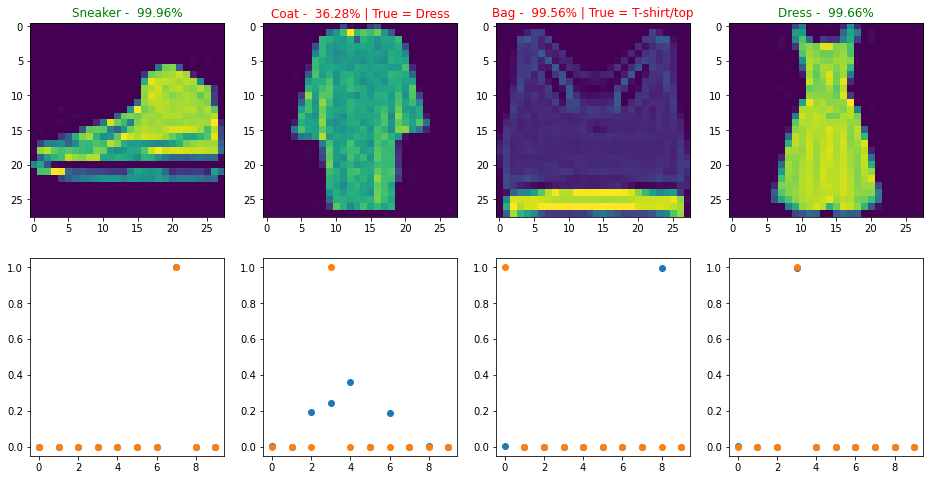

In [399]:
plot_predictions(test_data_normalized,test_labels)